In [5]:
# usando python 3.11.9
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image # Para manipulação básica de imagens

In [ ]:
metadata_path = '../data/train/MILK10k_Training_Metadata.csv' 
df_train = pd.read_csv(metadata_path)

# Visualizar as primeiras linhas
print("Primeiras 5 linhas do DataFrame de Metadados:")
print(df_train.head())

# Obter informações gerais
print("\nInformações sobre o DataFrame:")
df_train.info()

# Estatísticas descritivas (para colunas numéricas)
print("\nEstatísticas Descritivas:")
print(df_train.describe())

Primeiras 5 linhas do DataFrame de Metadados:
    lesion_id          image_type       isic_id      attribution   
0  IL_0000652  clinical: close-up  ISIC_8149219  MILK study team  \
1  IL_0000652         dermoscopic  ISIC_4671410  MILK study team   
2  IL_0003176  clinical: close-up  ISIC_3904045  MILK study team   
3  IL_0003176         dermoscopic  ISIC_5371928  MILK study team   
4  IL_0004688  clinical: close-up  ISIC_0791494  MILK study team   

  copyright_license image_manipulation  age_approx     sex  skin_tone_class   
0          CC-BY-NC            altered        70.0    male                1  \
1          CC-BY-NC    instrument only        70.0    male                1   
2          CC-BY-NC    instrument only        45.0  female                5   
3          CC-BY-NC    instrument only        45.0  female                5   
4          CC-BY-NC    instrument only        50.0    male                3   

              site  MONET_ulceration_crust  MONET_hair   
0   head_nec

In [ ]:
# Resumo estatistico das features
# mean - média, dp = std, 
df_train.describe()

,age_approx,skin_tone_class,MONET_ulceration_crust,MONET_hair,MONET_vasculature_vessels,MONET_erythema,MONET_pigmented,MONET_gel_water_drop_fluid_dermoscopy_liquid,MONET_skin_markings_pen_ink_purple_pen
count,10440.000000,10480.000000,10480.000000,10480.000000,10480.000000,10480.000000,10480.000000,10480.000000,10480.000000
mean,61.355364,3.209542,0.360170,0.281697,0.120773,0.355653,0.312637,0.244018,0.239441
std,15.691646,0.799361,0.231542,0.169726,0.183562,0.226047,0.264055,0.158110,0.220725
min,5.000000,0.000000,0.004519,0.012860,0.000039,0.006812,0.004111,0.005152,0.000345
25%,50.000000,3.000000,0.165659,0.143422,0.006610,0.157514,0.108379,0.125223,0.063859
50%,65.000000,3.000000,0.314602,0.251231,0.030420,0.326501,0.206067,0.207873,0.167687
75%,75.000000,4.000000,0.531885,0.391774,0.162910,0.531584,0.480979,0.328269,0.353858
max,85.000000,5.000000,0.987837,0.948830,0.959442,0.970064,0.974792,0.973334,0.989992


In [13]:
print(f"Total de Linhas: {len(df_train)}") # Deve ser 10480 (5240 * 2)
print(f"Lesões Únicas: {df_train['lesion_id'].nunique()}") # Deve ser 5240

# Verificação: As colunas de metadados gerais (age_approx, sex, site) devem ser as mesmas para ambas as imagens.
# Apenas 'image_type' e as anotações 'MONET' devem mudar significativamente.

Total de Linhas: 10480
Lesões Únicas: 5240


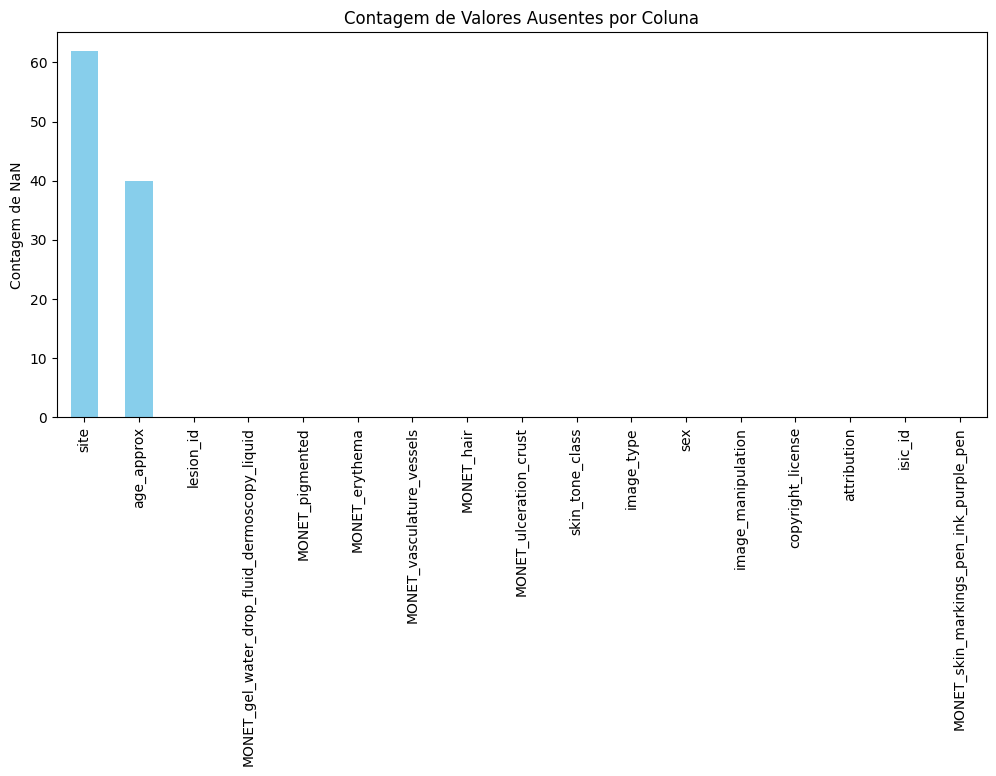

In [14]:
plt.figure(figsize=(12, 5))
df_train.isnull().sum().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Contagem de Valores Ausentes por Coluna')
plt.ylabel('Contagem de NaN')
plt.show()

# **Foco:** Analise 'age_approx', 'sex', 'skin_tone_class', e 'site'. Se faltarem muitos dados demográficos, 
# a capacidade de generalização do modelo pode ser comprometida.

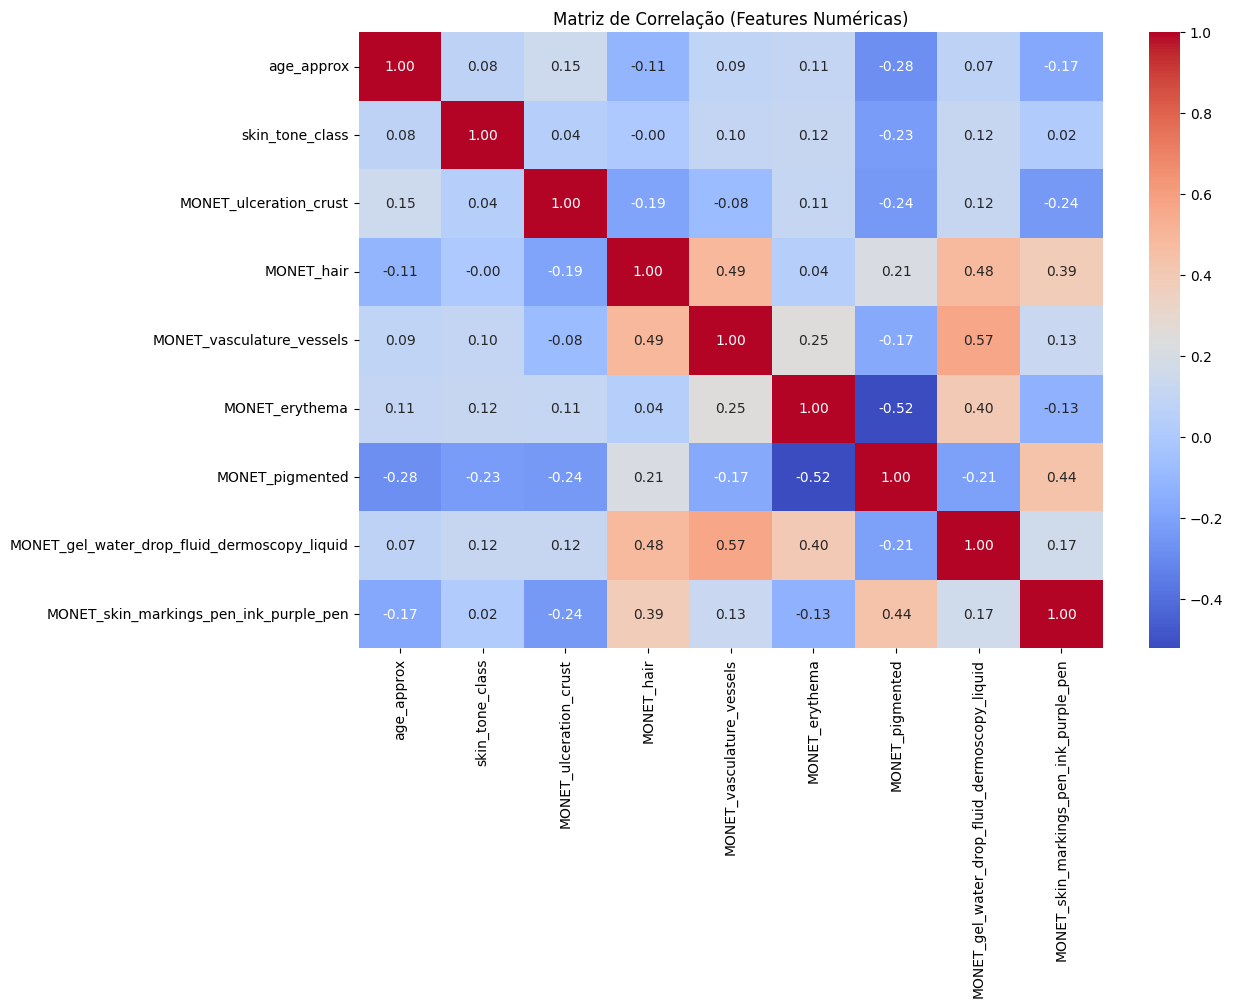

In [ ]:
# Selecionar apenas colunas numéricas
numeric_columns = df_train.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12,8))
correlation_matrix = df_train[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação (Features Numéricas)')
plt.show()

# não há alta correlações entre as variáveis. Alta correlação pode representar variáveis redundantes (nesse caso se aplica?)

In [8]:
print("\nContagem de Valores Ausentes por Coluna:")
print(df_train.isnull().sum())


Contagem de Valores Ausentes por Coluna:
lesion_id                                        0
image_type                                       0
isic_id                                          0
attribution                                      0
copyright_license                                0
image_manipulation                               0
age_approx                                      40
sex                                              0
skin_tone_class                                  0
site                                            62
MONET_ulceration_crust                           0
MONET_hair                                       0
MONET_vasculature_vessels                        0
MONET_erythema                                   0
MONET_pigmented                                  0
MONET_gel_water_drop_fluid_dermoscopy_liquid     0
MONET_skin_markings_pen_ink_purple_pen           0
dtype: int64


C:\Users\felip\AppData\Local\Temp\ipykernel_9248\2690968496.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df_train, palette='flare')


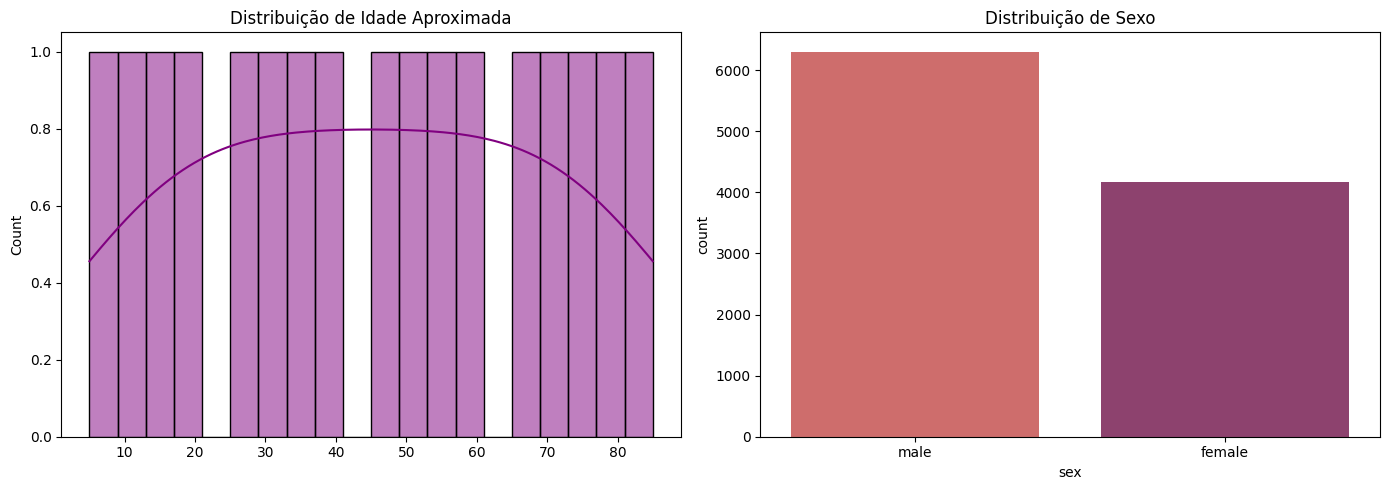

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_train['age_approx'].dropna().unique(), bins=20, kde=True, color='purple')
plt.title('Distribuição de Idade Aproximada') # distribuição quase normal

plt.subplot(1, 2, 2)
sns.countplot(x='sex', data=df_train, palette='flare')
plt.title('Distribuição de Sexo')

plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

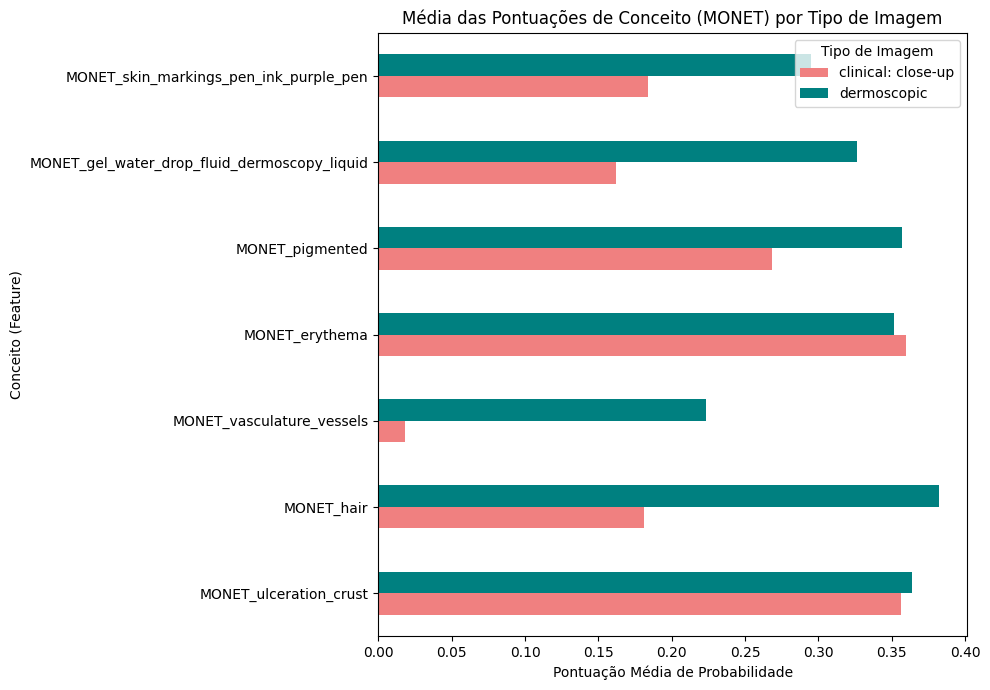

In [18]:
# Colunas de Anotação de Conceito
monet_cols = [col for col in df_train.columns if col.startswith('MONET_')]

# Preparar o DataFrame para comparação (pegando a média das 5240 lesões)
df_grouped = df_train.groupby('image_type')[monet_cols].mean().T # .T para transpor e facilitar a visualização

plt.figure(figsize=(10, 8))
df_grouped.plot(kind='barh', figsize=(10, 7), color=['lightcoral', 'teal'])
plt.title('Média das Pontuações de Conceito (MONET) por Tipo de Imagem')
plt.xlabel('Pontuação Média de Probabilidade')
plt.ylabel('Conceito (Feature)')
plt.legend(title='Tipo de Imagem')
plt.tight_layout()
plt.show()

# **Interpretação:**
# - Espera-se que `MONET_gel_water_drop_fluid_dermoscopy_liquid` seja maior na dermatoscópica.
# - Espera-se que `MONET_hair` possa ser maior ou mais consistente na dermatoscópica devido ao zoom e iluminação.
# - A diferença nas pontuações de `MONET_pigmented` ou `MONET_erythema` entre os dois tipos é uma pista sobre o valor de cada modalidade.

In [20]:
# 1. Identificar as colunas de anotação de conceito
monet_cols = [col for col in df_train.columns if col.startswith('MONET_')]

# 2. Criar uma lista das colunas que queremos agrupar e manter (colunas de identificação e demográficas)
group_cols = ['lesion_id', 'age_approx', 'sex', 'skin_tone_class', 'site']

# 3. Agrupar pelo 'lesion_id' e calcular a MÉDIA das anotações MONET.
# Isso reduz 10480 linhas para 5240 linhas (uma por lesão)
df_lesion_mean = df_train.groupby(group_cols)[monet_cols].mean().reset_index()

print("DataFrame com a Média dos Conceitos MONET por Lesão (Amostra):")
print(df_lesion_mean.head())
print(f"Novo número de linhas (Lesões Únicas): {len(df_lesion_mean)}")

DataFrame com a Média dos Conceitos MONET por Lesão (Amostra):
    lesion_id  age_approx     sex  skin_tone_class             site   
0  IL_0000652        70.0    male                1   head_neck_face  \
1  IL_0003176        45.0  female                5   head_neck_face   
2  IL_0004688        50.0    male                3  lower_extremity   
3  IL_0005081        45.0    male                3   head_neck_face   
4  IL_0006177        75.0    male                3  upper_extremity   

   MONET_ulceration_crust  MONET_hair  MONET_vasculature_vessels   
0                0.413304    0.160039                   0.009341  \
1                0.370780    0.756193                   0.190648   
2                0.719220    0.164528                   0.100499   
3                0.755047    0.349474                   0.223619   
4                0.078801    0.434080                   0.217135   

   MONET_erythema  MONET_pigmented   
0        0.078336         0.783255  \
1        0.546630        

In [ ]:
# Caminhos dos arquivos (substitua pelos seus)
metadata_path = '../data/train/MILK10k_Training_Metadata.csv' 
groundtruth_path = '../data/train/MILK10k_Training_GroundTruth.csv'

# Carregar Dados
df_meta = pd.read_csv(metadata_path)
df_gt = pd.read_csv(groundtruth_path)

# 1. Agregação dos Metadados MONET
# Como discutido, calculamos a média das anotações MONET por lesion_id
monet_cols = [col for col in df_meta.columns if col.startswith('MONET_')]
group_cols = ['lesion_id', 'age_approx', 'sex', 'skin_tone_class', 'site']

# Agrupa por lesion_id para ter apenas uma linha por lesão com a média MONET
df_lesion_data = df_meta.groupby(group_cols, dropna=False)[monet_cols].mean().reset_index()

# 2. Integração com o Ground Truth (Rótulos de Diagnóstico)
# Agora juntamos os metadados agregados com os rótulos de diagnóstico final
df_final = pd.merge(df_lesion_data, df_gt, on='lesion_id', how='inner')

print(f"Número final de lesões únicas integradas: {len(df_final)}")
print("\nEstrutura do DataFrame Final:") # adicionadas as colunas com a classificação da doença correta 
print(df_final.head())

Número final de lesões únicas integradas: 5240

Estrutura do DataFrame Final:
    lesion_id  age_approx     sex  skin_tone_class             site   
0  IL_0000652        70.0    male                1   head_neck_face  \
1  IL_0003176        45.0  female                5   head_neck_face   
2  IL_0004688        50.0    male                3  lower_extremity   
3  IL_0005081        45.0    male                3   head_neck_face   
4  IL_0006177        75.0    male                3  upper_extremity   

   MONET_ulceration_crust  MONET_hair  MONET_vasculature_vessels   
0                0.413304    0.160039                   0.009341  \
1                0.370780    0.756193                   0.190648   
2                0.719220    0.164528                   0.100499   
3                0.755047    0.349474                   0.223619   
4                0.078801    0.434080                   0.217135   

   MONET_erythema  MONET_pigmented  ...  BCC  BEN_OTH  BKL   DF  INF  MAL_OTH   
0    

In [22]:
# Colunas das 11 classes de diagnóstico
diag_cols = df_gt.columns.drop('lesion_id').tolist()

# Criar a coluna 'diagnostic_class' que contém o nome da classe
# idxmax(axis=1) retorna o nome da coluna com o valor máximo (1.0) para cada linha
df_final['diagnostic_class'] = df_final[diag_cols].idxmax(axis=1)

print("\nPrimeiras 5 lesões com a classe de diagnóstico única:")
print(df_final[['lesion_id', 'diagnostic_class']].head())


Primeiras 5 lesões com a classe de diagnóstico única:
    lesion_id diagnostic_class
0  IL_0000652              BCC
1  IL_0003176              BCC
2  IL_0004688              BCC
3  IL_0005081            SCCKA
4  IL_0006177              BCC


C:\Users\felip\AppData\Local\Temp\ipykernel_9248\2193994125.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='RdYlBu')


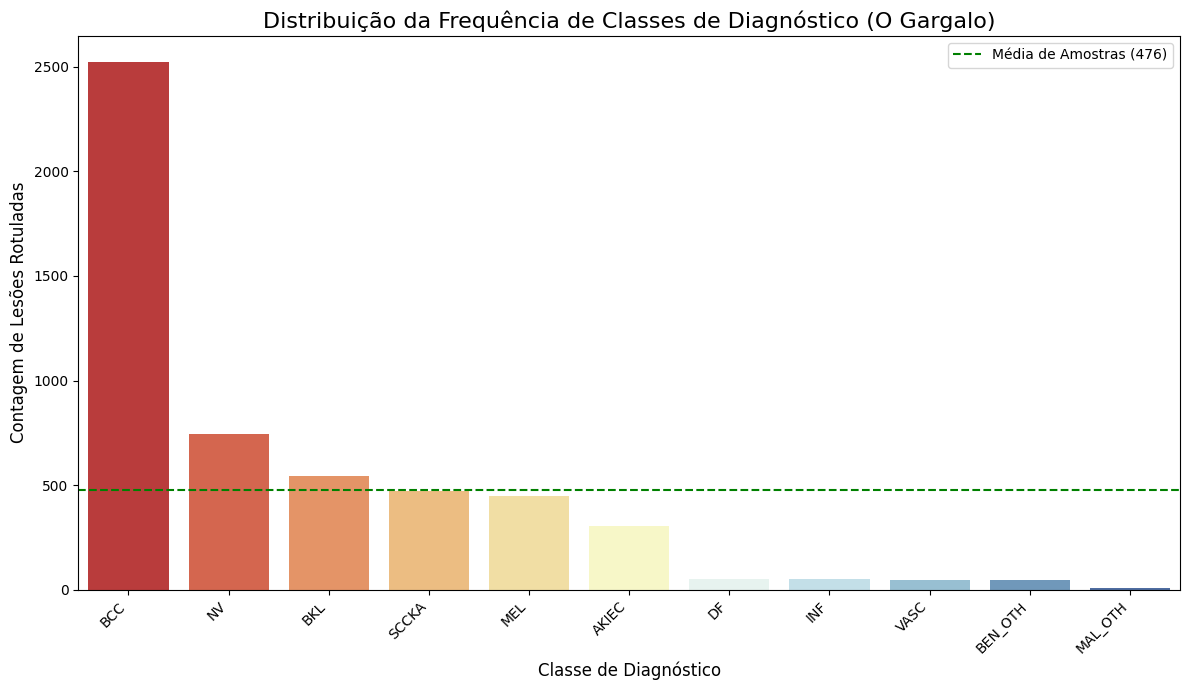

In [ ]:
plt.figure(figsize=(12, 7))
class_counts = df_final['diagnostic_class'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values, palette='RdYlBu')
plt.title('Distribuição da Frequência de Classes de Diagnóstico (O Gargalo)', fontsize=16)
plt.xlabel('Classe de Diagnóstico', fontsize=12)
plt.ylabel('Contagem de Lesões Rotuladas', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Adicionar linhas horizontais para destacar classes de minoria
mean_count = class_counts.mean()
plt.axhline(y=mean_count, color='green', linestyle='--', label=f'Média de Amostras ({mean_count:.0f})')
plt.legend()
plt.tight_layout()
plt.show()

# **Conclusão importante:** 
# Classes minoritárias (como DF, INF, MAL_OTH) têm um custo de rotulagem muito alto em modelos supervisionados, PERFEITO PRA GENTE.

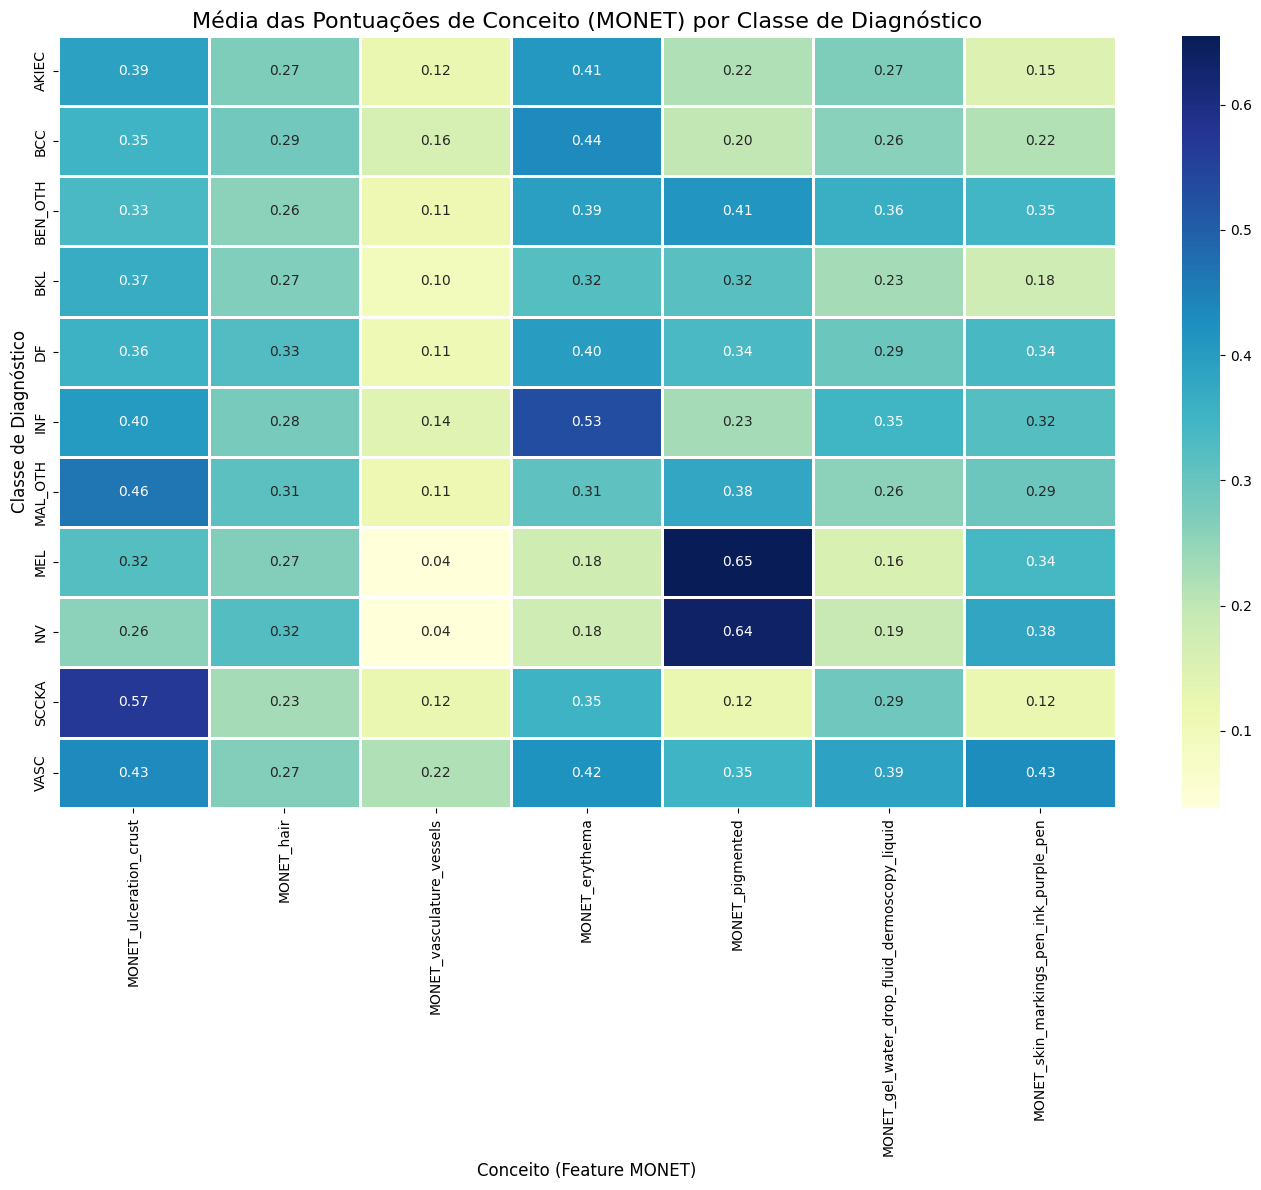

In [ ]:
# Calcular a média das anotações MONET para CADA CLASSE DE DIAGNÓSTICO
monet_by_class = df_final.groupby('diagnostic_class')[monet_cols].mean()

plt.figure(figsize=(14, 12))
sns.heatmap(
    monet_by_class,
    annot=True,
    cmap='YlGnBu',  # Cores mais escuras indicam maior pontuação média
    fmt=".2f",
    linewidths=1.8
)
plt.title('Média das Pontuações de Conceito (MONET) por Classe de Diagnóstico', fontsize=16)
plt.ylabel('Classe de Diagnóstico', fontsize=12)
plt.xlabel('Conceito (Feature MONET)', fontsize=12)
plt.tight_layout()
plt.show()

# **Conclusão para Pesquisa:**
# * Se NV (Nevus) tem alta pontuação em 'MONET_pigmented', e baixa em 'MONET_ulceration', isso sugere que o conceito é um bom **discriminador** para o rótulo.
# * O Aprendizado Ativo pode usar essas anotações (mais fáceis de obter) como um **proxy de incerteza** ou **diversidade** do dado, 
# antes de solicitar o rótulo de diagnóstico caro. Isso quer dizer que o observador vai ter uma ajudinha